In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

## Load Data

In [2]:
data = pd.read_csv('Marker_Segmentation.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


## Visualizing Data

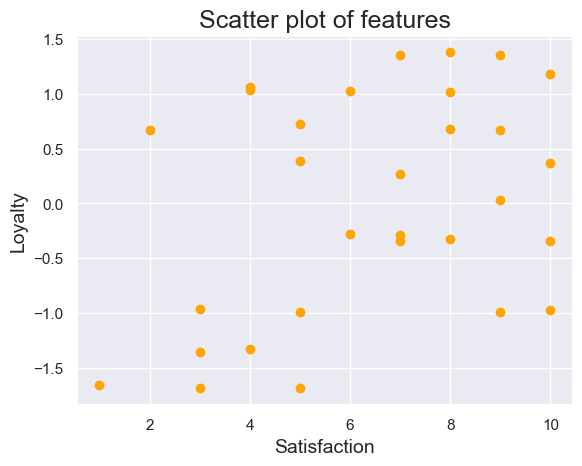

In [3]:
plt.scatter(data['Satisfaction'], data['Loyalty'], c='orange')
plt.title('Scatter plot of features', size=18)
plt.ylabel('Loyalty', size=14)
plt.xlabel('Satisfaction', size=14)
plt.show()

## Select Features For Clusterin

In [4]:
x = data.copy()
kmean = KMeans(n_clusters=4)
kmean.fit(x)

C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

## Results

In [5]:
data_with_clusters = x.copy()
data_with_clusters['Clusters'] = kmean.fit_predict(x)
data_with_clusters.head()

C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Satisfaction,Loyalty,Clusters
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,3
3,7,-0.29,2
4,4,1.06,3


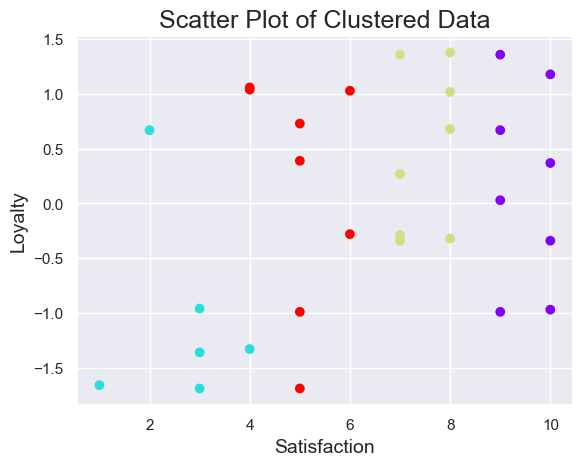

In [6]:
plt.scatter(data_with_clusters['Satisfaction'], data_with_clusters['Loyalty'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.title('Scatter Plot of Clustered Data', size=18)
plt.xlabel('Satisfaction', size=14)
plt.ylabel('Loyalty', size=14)
plt.show()

## Standardizing The Variables

In [7]:
from sklearn.preprocessing import scale
x_scaled = scale(x)
x_scaled = pd.DataFrame(x_scaled, columns=['Satisfaction_Scaled', 'Loyalty_Scaled'])
x_scaled.head()

,Satisfaction_Scaled,Loyalty_Scaled
0,-0.931381,-1.331811
1,-0.155230,-0.281171
2,-0.543305,-0.991604
3,0.232845,-0.291177
4,-0.931381,1.059645


In [8]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(x_scaled)

C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [9]:
new_x_scaled = x_scaled.copy()
new_x_scaled['Clusters'] = kmeans2.fit_predict(x_scaled)
new_x_scaled.head()

C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Satisfaction_Scaled,Loyalty_Scaled,Clusters
0,-0.931381,-1.331811,2
1,-0.155230,-0.281171,1
2,-0.543305,-0.991604,2
3,0.232845,-0.291177,1
4,-0.931381,1.059645,3


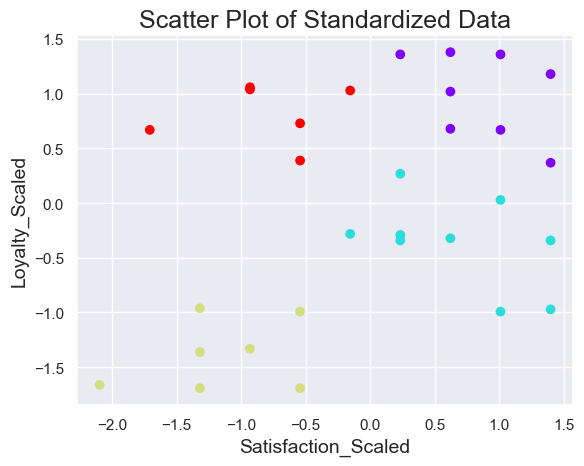

In [10]:
plt.scatter(new_x_scaled.Satisfaction_Scaled, new_x_scaled.Loyalty_Scaled, 
            c=new_x_scaled.Clusters, cmap='rainbow')
plt.title('Scatter Plot of Standardized Data', size=18)
plt.ylabel('Loyalty_Scaled', size=14)
plt.xlabel('Satisfaction_Scaled', size=14)
plt.show()

## Selecting The Number of Clusters

### Implementing _Elbow Method_

In [11]:
wcss = []
for i in range(1, 11):
    kmean = KMeans(i)
    kmean.fit(x_scaled)
    wcss.append(kmean.inertia_)

C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

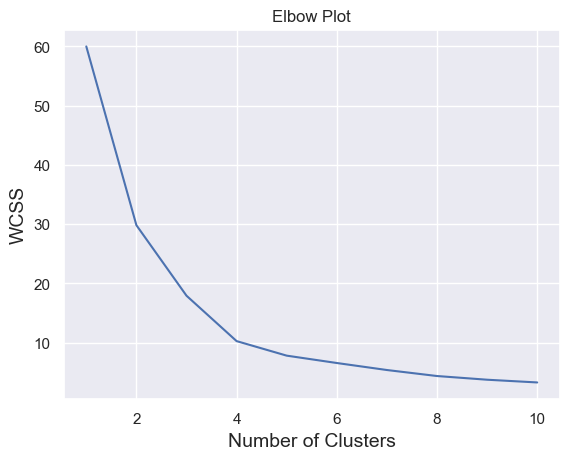

In [12]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters', size=14)
plt.ylabel('WCSS', size=14)
plt.show()

In [21]:
kmeans_new = KMeans(n_clusters=4) # According to the above figure, the best number of cluster is 4.
clusters_new = x.copy()
clusters_new['Cluster_Pred'] = kmeans_new.fit_predict(x_scaled) 
clusters_new.head()

C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Parisa\miniconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Satisfaction,Loyalty,Cluster_Pred
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,2
3,7,-0.29,1
4,4,1.06,3


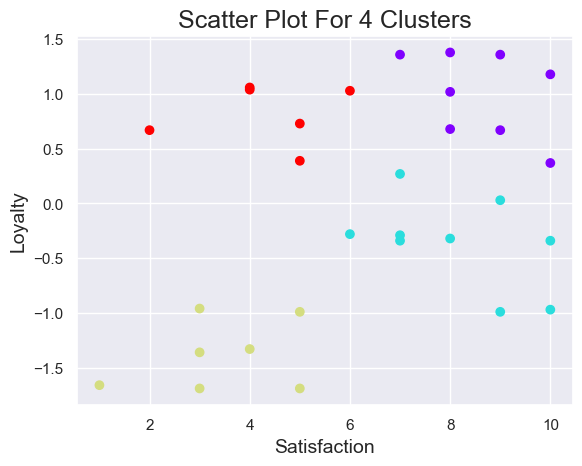

In [22]:
plt.scatter(clusters_new.Satisfaction, clusters_new.Loyalty, 
            c=clusters_new.Cluster_Pred, cmap='rainbow')
plt.title('Scatter Plot For 4 Clusters', size=18)
plt.xlabel('Satisfaction', size=14)
plt.ylabel('Loyalty', size=14);